# SENTIMENTAL AI
# SnT Summer Project, BCS-IITK
## Assignment-2

Reference- https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()




corpus = data.lower().split("\n")  #convert to lower case and then split the data on '\n' to create a corpus of lines

tokenizer.fit_on_texts(corpus) #fit the tokenizer on the corpus
total_words = len(tokenizer.word_index) + 1



# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
mx=0
for sentence in input_sequences:
    if len(sentence)>mx:
        mx=len(sentence)
max_sequence_len = mx
input_sequences = pad_sequences(input_sequences, maxlen=mx, padding='pre')

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2022-06-17 13:34:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 172.217.164.176, 142.251.45.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-06-17 13:34:55 (92.6 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(54, return_sequences=True)))  #(# A Bidirectional LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(64))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary()) #print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 108)          66960     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 108)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                44288     
                                                                 
 dense (Dense)               (None, 1605)              104325    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1) #change the number of epochs after observing the plots later on at the point where the accuracy saturates

Epoch 1/100
484/484 [==============================] - 13s 9ms/step - loss: 6.8404 - accuracy: 0.0255
Epoch 2/100
484/484 [==============================] - 4s 9ms/step - loss: 6.4309 - accuracy: 0.0310
Epoch 3/100
484/484 [==============================] - 4s 9ms/step - loss: 6.2262 - accuracy: 0.0365
Epoch 4/100
484/484 [==============================] - 4s 9ms/step - loss: 6.0238 - accuracy: 0.0433
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 5.7705 - accuracy: 0.0515
Epoch 6/100
484/484 [==============================] - 4s 9ms/step - loss: 5.4828 - accuracy: 0.0676
Epoch 7/100
484/484 [==============================] - 4s 9ms/step - loss: 5.1864 - accuracy: 0.0799
Epoch 8/100
484/484 [==============================] - 4s 9ms/step - loss: 4.8909 - accuracy: 0.0940
Epoch 9/100
484/484 [==============================] - 4s 9ms/step - loss: 4.5813 - accuracy: 0.1109
Epoch 10/100
484/484 [==============================] - 4s 9ms/step - loss: 4.2613 - accu

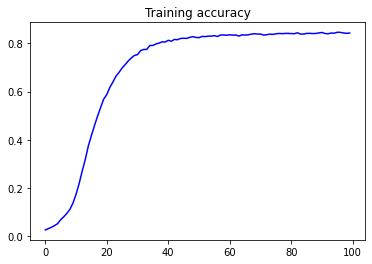

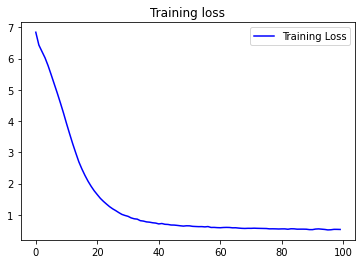

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "The clouds are in the "
next_words = 5 #Play with this quantity to change the number of words you want to see in the output after the seed_text

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list)
  classes_x = np.argmax(predict_x, axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

The clouds are in the  other and my pupil pen
